# Small Molecules EDA and processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import rdMolDescriptors
from IPython.display import display, HTML

In [3]:
from rdkit.Chem import Descriptors 
from rdkit.Chem import MolFromSmiles
from rdkit import Chem
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(True)
from rdkit import Chem
from rdkit.Chem import Draw

In [4]:
from rdkit.Chem import Lipinski
from rdkit.DataStructs import TanimotoSimilarity

In [5]:
import plotly.express as px

In [6]:
SmallMolecules = pd.read_csv("data/HarvardSmallMolecules.csv")

In [7]:
columns = ['Name', 'Molecular Mass', 'SMILES']
drugs_EDA = SmallMolecules[columns]

In [8]:
PandasTools.AddMoleculeColumnToFrame(drugs_EDA, smilesCol='SMILES', molCol='structure')

/opt/anaconda3/lib/python3.12/site-packages/rdkit/Chem/PandasTools.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


In [9]:
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return {"LogP": None,
            "NumHDonors": None,
            "NumHAcceptors": None,
            "TPSA": None,
            "Fingerprint": None}
    return {"LogP": Descriptors.MolLogP(mol),
        "NumHDonors": Lipinski.NumHDonors(mol),
        "NumHAcceptors": Lipinski.NumHAcceptors(mol),
        "TPSA": Descriptors.TPSA(mol),
        "Fingerprint": AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048)}

In [10]:
descriptor_df = drugs_EDA["SMILES"].apply(compute_descriptors).apply(pd.Series)
drugs_EDA = pd.concat([drugs_EDA, descriptor_df], axis=1)

[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerator
[03:24:37] DEPRECATION WARNING: please use MorganGenerat

Name  Molecular Mass  \
0        AZD7762          362.12   
1      Neratinib          556.20   
2      Dasatinib          487.16   
3    Saracatinib          541.21   
4     Pictilisib          513.16   
5    Palbociclib          447.24   
6         Torin2          432.12   
7          Taxol          853.33   
8     Tivantinib          369.15   
9     Trametinib          615.08   
10      Olaparib          434.18   
11    Buparlisib          410.17   
12    Luminespib          465.23   
13        TGX221          364.19   
14       ABT-737          812.26   
15  Cabozantinib          501.17   
16       INK-128          309.13   
17     Alpelisib          441.14   
18    Everolimus          957.58   
19     Cisplatin          298.96   
20   Doxorubicin          543.17   
21     Etoposide          588.18   
22     Topotecan          421.16   
23    Vorinostat          264.15   
24    Dinaciclib          396.23   
25   Ipatasertib          457.22   
26    Volasertib          618.40   
27   Abemaciclib          506.27   
28     Ceritinib          557.22   
29    PF-4708671          390.18   
30     Cediranib          450.21   
31     Taselisib          460.23   
32     A-1210477          849.39   
33     Bleomycin         1414.52   

                                               SMILES  \
0   C1C[C@H](CNC1)NC(=O)C2=C(C=C(S2)C3=CC(=CC=C3)F...   
1   CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)OCC4=...   
2   CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=NC(=NC(...   
3   CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(C=CC...   
4   CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...   
5   CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...   
6   C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...   
7   CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@](C3[...   
8   C1CC2=CC=CC3=C2N(C1)C=C3[C@H]4[C@@H](C(=O)NC4=...   
9   CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...   
10  C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC...   
11  C1COCCN1C2=NC(=NC(=C2)C3=CN=C(C=C3C(F)(F)F)N)N...   
12  CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...   
13  CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3)N4C...   
14  CN(C)CC[C@H](CSC1=CC=CC=C1)NC2=C(C=C(C=C2)S(=O...   
15  COC1=CC2=C(C=CN=C2C=C1OC)OC3=CC=C(C=C3)NC(=O)C...   
16  CC(C)N1C2=C(C(=N1)C3=CC4=C(C=C3)OC(=N4)N)C(=NC...   
17  CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...   
18  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...   
19                             N.N.[Cl-].[Cl-].[Pt+2]   
20  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...   
21  C[C@@H]1OC[C@@H]2[C@@H](O1)[C@@H]([C@H]([C@@H]...   
22  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=C(C3=C2)N=C5C=...   
23                   C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO   
24  CCC1=C2N=C(C=C(N2N=C1)NCC3=C[N+](=CC=C3)[O-])N...   
25  C[C@@H]1C[C@H](C2=C1C(=NC=N2)N3CCN(CC3)C(=O)[C...   
26  O=C(N[C@H]1CC[C@H](N2CCN(CC3CC3)CC2)CC1)C4=CC=...   
27  CCN1CCN(CC1)CC2=CN=C(C=C2)NC3=NC=C(C(=N3)C4=CC...   
28  CC1=CC(=C(C=C1C2CCNCC2)OC(C)C)NC3=NC=C(C(=N3)N...   
29  CCC1=CN=CN=C1N2CCN(CC2)CC3=NC4=C(N3)C=C(C=C4)C...   
30  CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NC4=CC(=C(C=C43)...   
31  CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=C...   
32  CN(C)S(=O)(=O)N1CCN(CC1)C1=CC=C(OCC2=C(C(C)=NN...   
33  CC1=C(N=C(N=C1N)[C@H](CC(=O)N)NC[C@@H](C(=O)N)...   

                                        structure     LogP  NumHDonors  \
0   <rdkit.Chem.rdchem.Mol object at 0x36b922030>  2.52660           4   
1   <rdkit.Chem.rdchem.Mol object at 0x36b922880>  5.93248           2   
2   <rdkit.Chem.rdchem.Mol object at 0x36b922730>  3.31354           3   
3   <rdkit.Chem.rdchem.Mol object at 0x36b9229d0>  3.93950           1   
4   <rdkit.Chem.rdchem.Mol object at 0x36b922a40>  2.14840           1   
5   <rdkit.Chem.rdchem.Mol object at 0x36b922ab0>  2.96582           2   
6   <rdkit.Chem.rdchem.Mol object at 0x36b922b20>  5.20190           1   
7   <rdkit.Chem.rdchem.Mol object at 0x36b922b90>  3.73570           4   
8   <rdkit.Chem.rdchem.Mol object at 0x36b922c00>  3.59260           2   
9   <rdkit.Chem
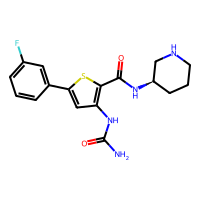
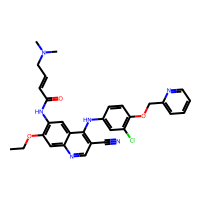
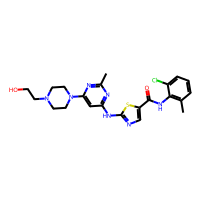
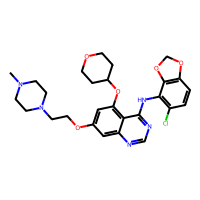
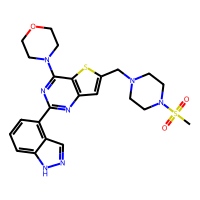
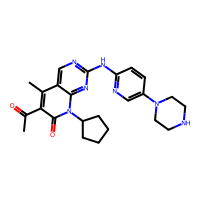
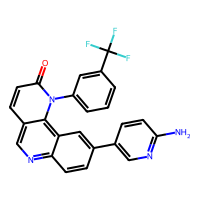
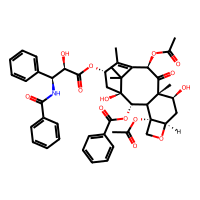
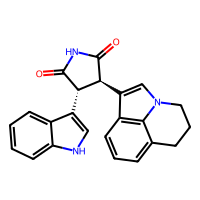
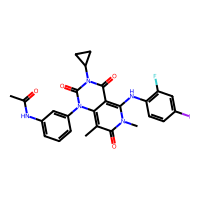
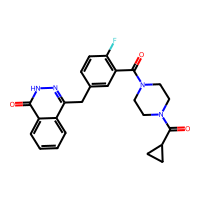
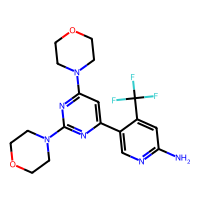
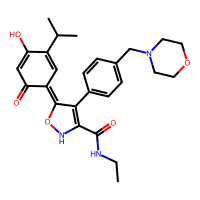
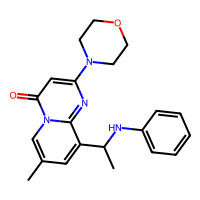
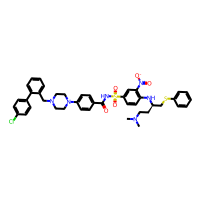
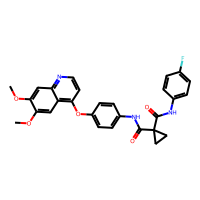
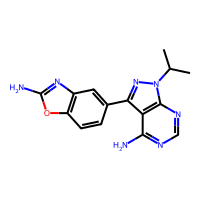
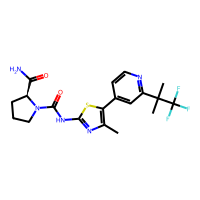
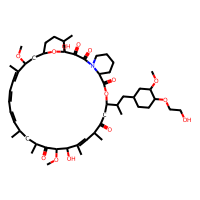
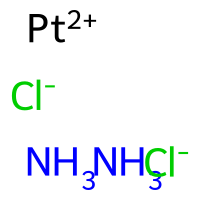
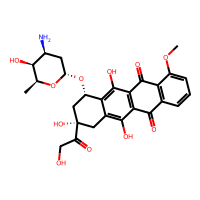
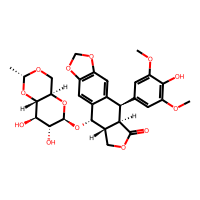
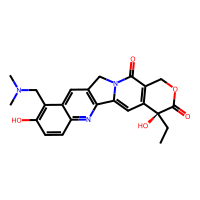
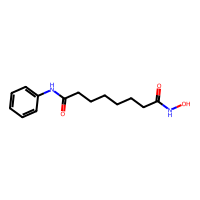
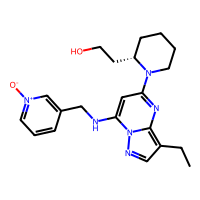
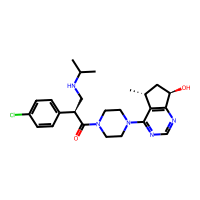
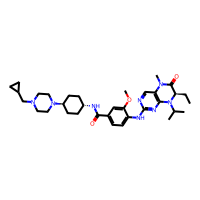
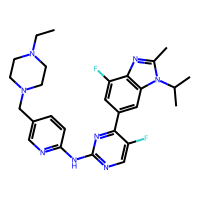
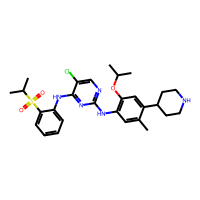
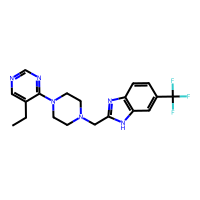
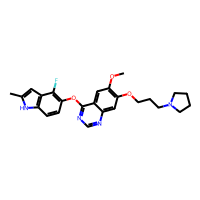
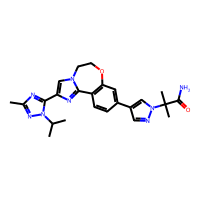
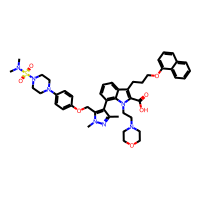
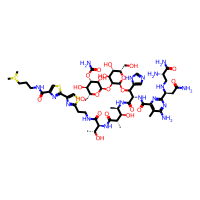

In [11]:
drugs_EDA

In [13]:
drugs_EDA[["Name","Molecular Mass", "LogP", "NumHDonors", "NumHAcceptors", "TPSA"]]

Name  Molecular Mass     LogP  NumHDonors  NumHAcceptors    TPSA
0        AZD7762          362.12  2.52660           4              4   96.25
1      Neratinib          556.20  5.93248           2              8  112.40
2      Dasatinib          487.16  3.31354           3              9  106.51
3    Saracatinib          541.21  3.93950           1             10   90.44
4     Pictilisib          513.16  2.14840           1              9  107.55
5    Palbociclib          447.24  2.96582           2              9  105.04
6         Torin2          432.12  5.20190           1              5   73.80
7          Taxol          853.33  3.73570           4             14  221.29
8     Tivantinib          369.15  3.59260           2              3   66.89
9     Trametinib          615.08  3.94012           2              8  107.13
10      Olaparib          434.18  2.34740           1              4   86.37
11    Buparlisib          410.17  1.81280           1              8   89.63
12    Luminespib          465.23  2.76190           3              7  100.13
13        TGX221          364.19  3.01262           1              6   58.87
14       ABT-737          812.26  7.88060           2             10  128.13
15  Cabozantinib          501.17  5.54080           2              6   98.78
16       INK-128          309.13  2.37980           2              8  121.67
17     Alpelisib          441.14  3.83502           2              5  101.21
18    Everolimus          957.58  6.19720           3             14  204.66
19     Cisplatin          298.96 -5.67050           2              2   70.00
20   Doxorubicin          543.17  0.00130           6             12  206.07
21     Etoposide          588.18  1.33860           3             13  160.83
22     Topotecan          421.16  1.84680           2              8  104.89
23    Vorinostat          264.15  2.47110           3              3   78.43
24    Dinaciclib          396.23  2.27850           2              7   92.63
25   Ipatasertib          457.22  3.10100           2              6   81.59
26    Volasertib          618.40  4.26720           2              9  106.17
27   Abemaciclib          506.27  4.93692           1              8   75.00
28     Ceritinib          557.22  6.36192           3              8  105.24
29    PF-4708671          390.18  3.25630           1              5   60.94
30     Cediranib          450.21  5.22422           1              6   72.50
31     Taselisib          460.23  3.17422           1              9  118.67
32     A-1210477          849.39  6.05282           1             11  134.84
33     Bleomycin         1414.52 -7.70358          20             31  627.07

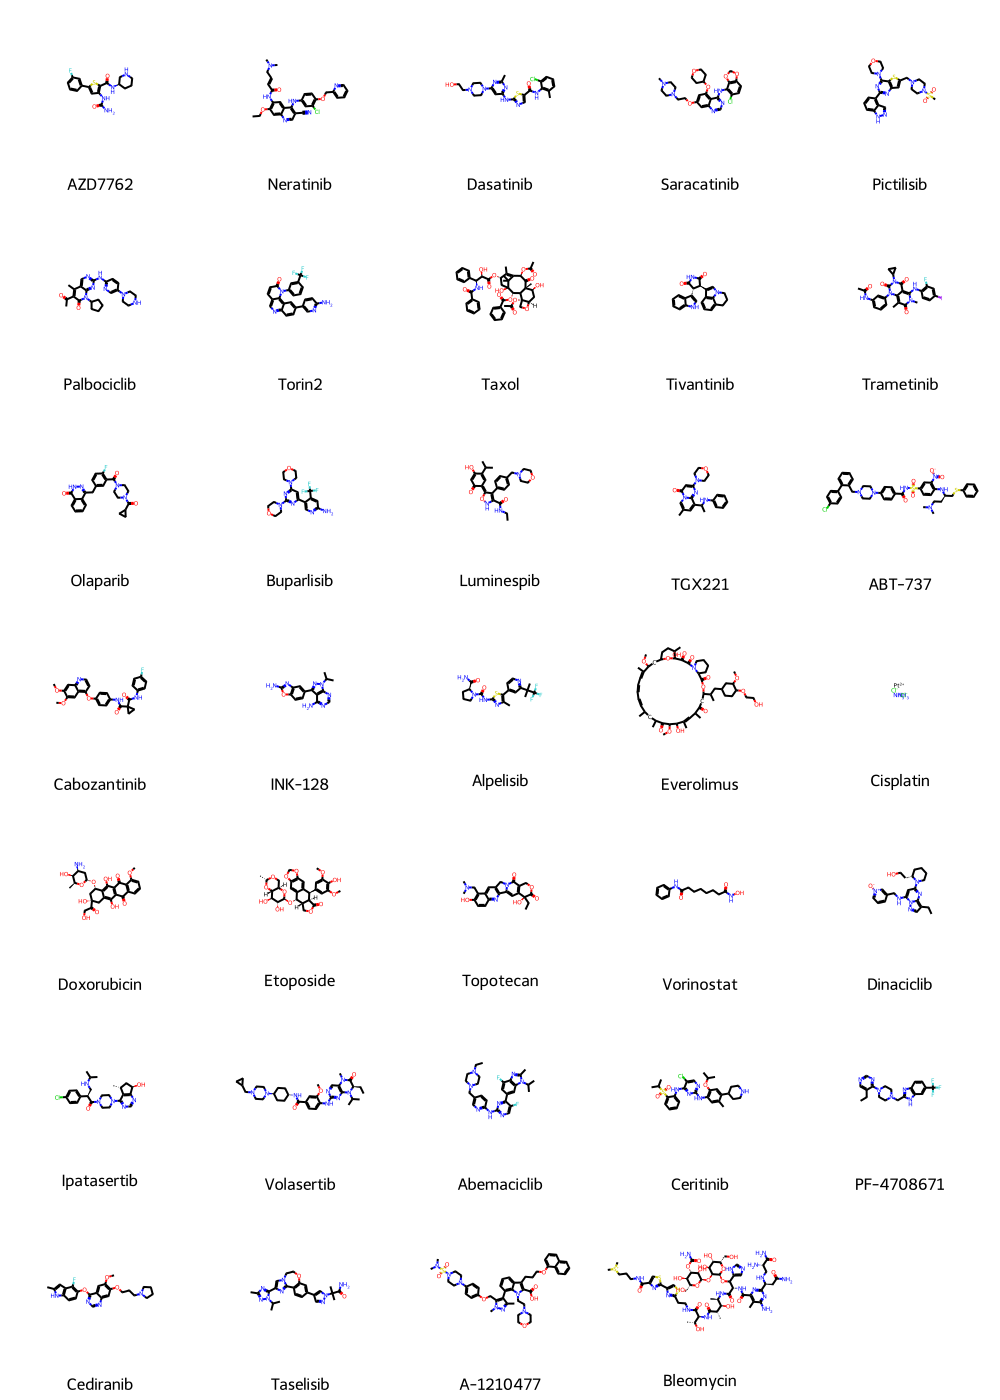

In [14]:
mols = [Chem.MolFromSmiles(smiles) for smiles in SmallMolecules["SMILES"]]
names = SmallMolecules["Name"].tolist()

img = Draw.MolsToGridImage(
    mols,
    legends=names,
    molsPerRow=5, 
    subImgSize=(200,200)  

from IPython.display import display
display(img)


In [15]:
fps = drugs_EDA["Fingerprint"].tolist()
names = drugs_EDA["Name"].tolist()
n = len(fps)

# similarity matrix
sim_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        sim_matrix[i, j] = TanimotoSimilarity(fps[i], fps[j])

sim_df = pd.DataFrame(sim_matrix, index=names, columns=names)

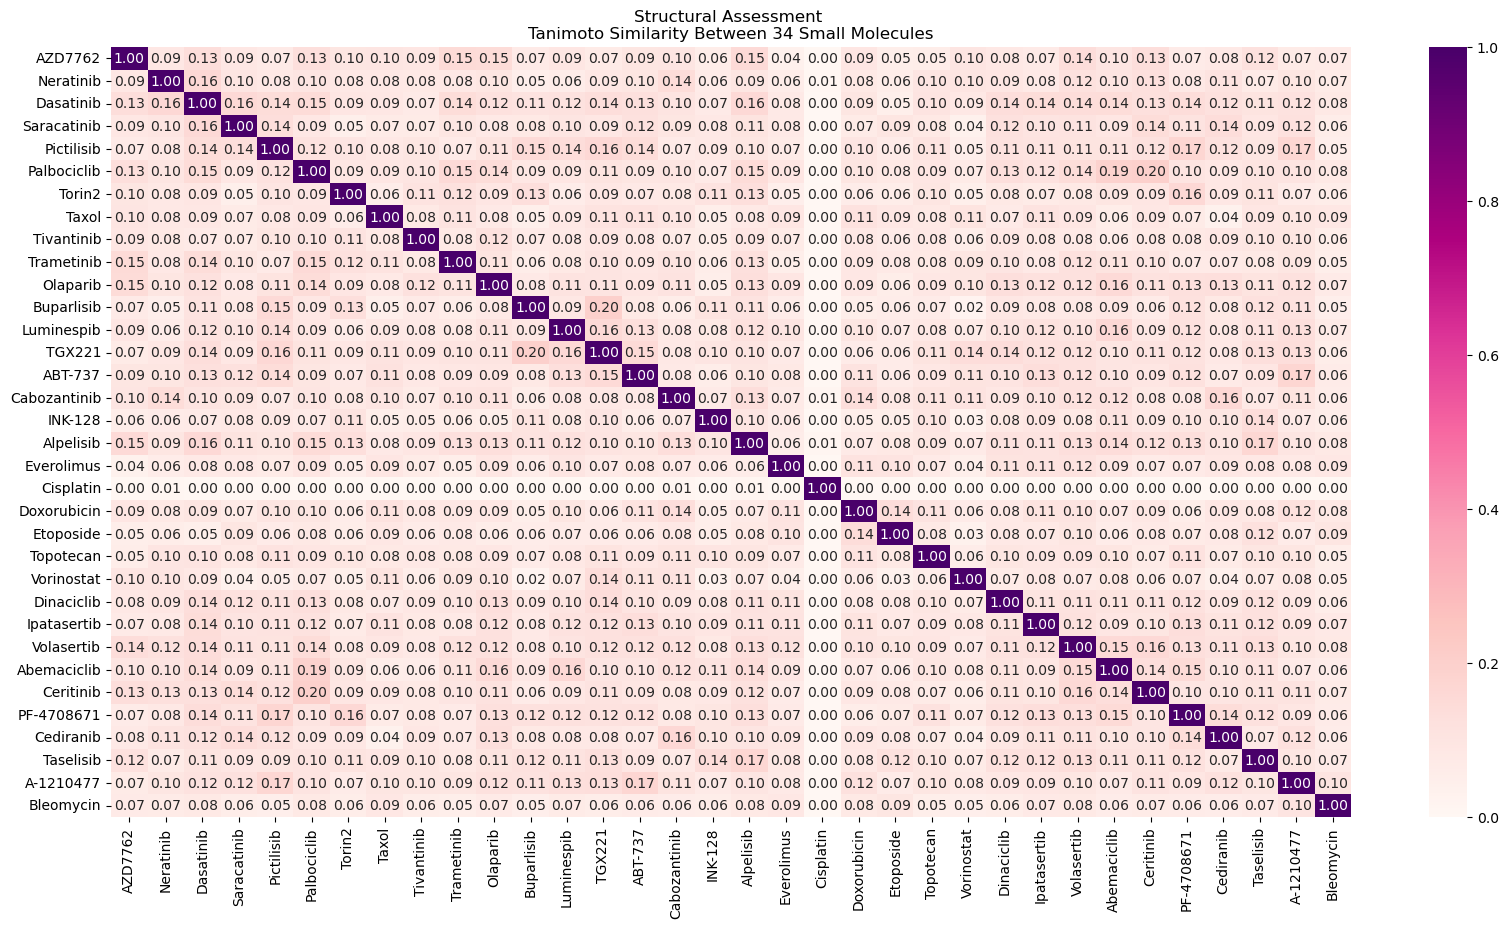

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(sim_df, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Structural Assessment \nTanimoto Similarity Between 34 Small Molecules")
plt.show()

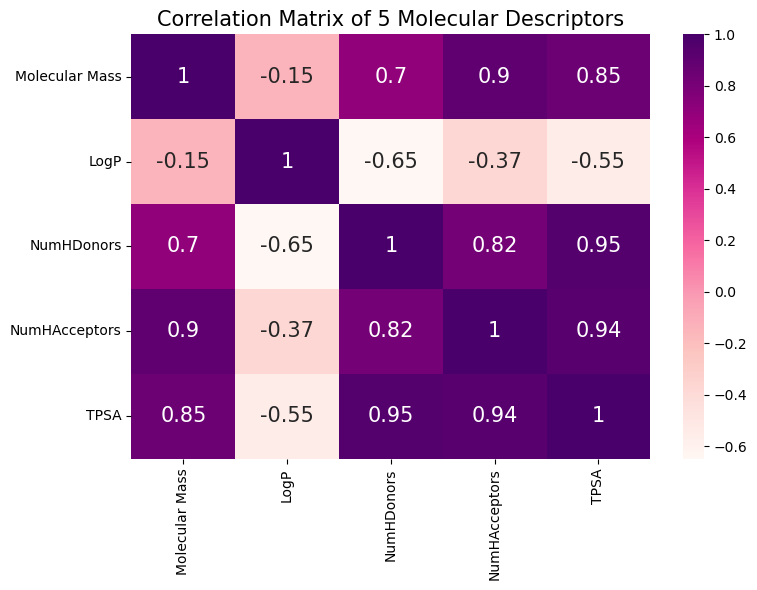

In [18]:
# correlation matrix
descriptor_cols = ['Molecular Mass', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA']
corr_matrix = drugs_EDA[descriptor_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="RdPu", annot_kws={"size": 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Matrix of 5 Molecular Descriptors", fontsize=15)
plt.tight_layout()
plt.show()

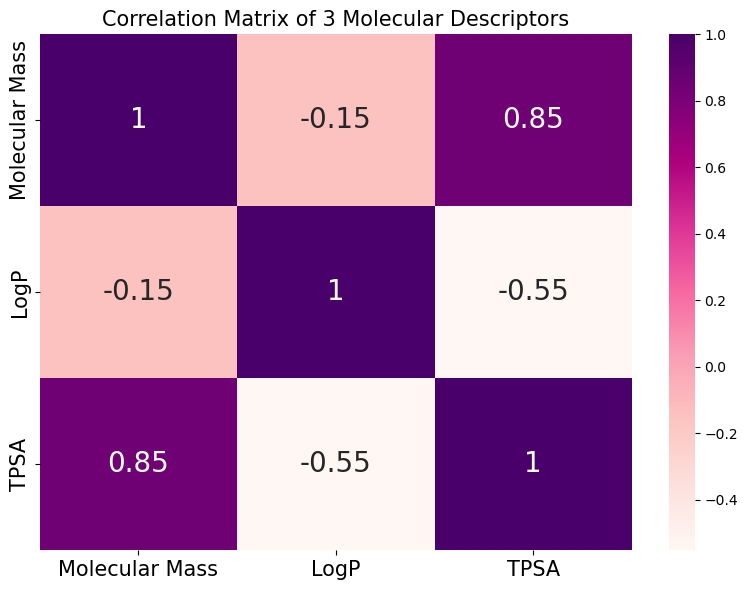

In [28]:
descriptor_cols = ["Molecular Mass", "LogP", "TPSA"] # TPSA abd Hacceptors/donors tend to be correlated with one another. 
corr_matrix = drugs_EDA[descriptor_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="RdPu", annot_kws={"size": 20} )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation Matrix of 3 Molecular Descriptors", fontsize=15)
plt.tight_layout()
plt.show()


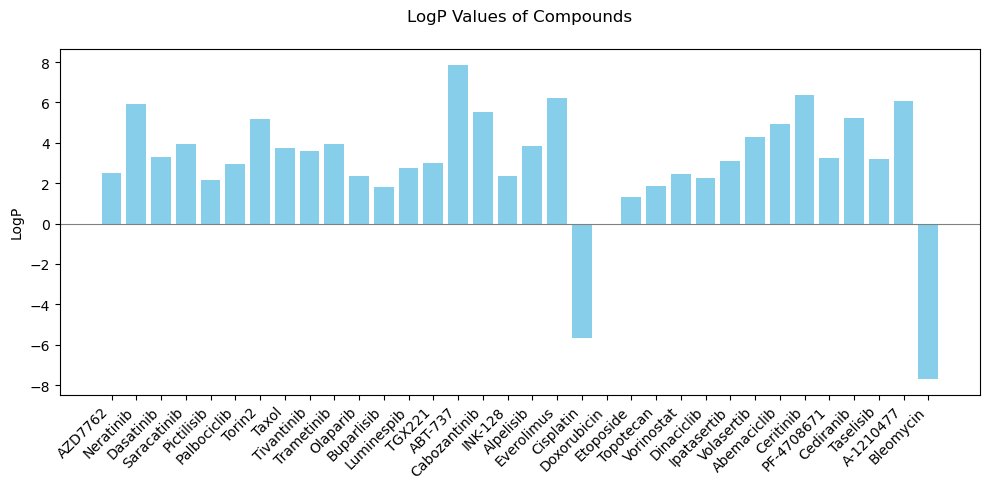

In [33]:
plt.figure(figsize=(10, 5))
bars = plt.bar(drugs_EDA["Name"], drugs_EDA["LogP"], color='skyblue')
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylabel("LogP")
plt.title("LogP Values of Compounds", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

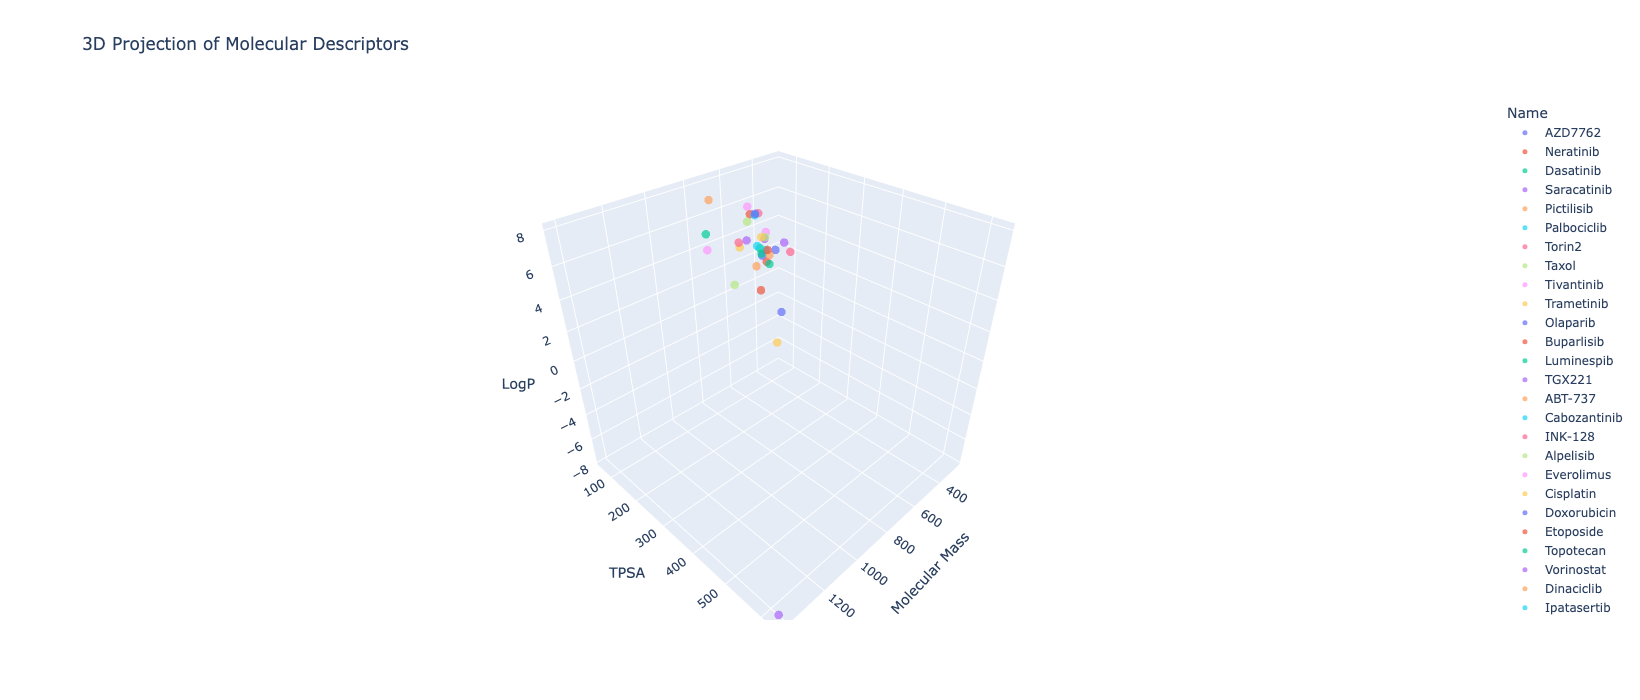

In [38]:
fig = px.scatter_3d(
    drugs_EDA,
    width=900,
    height=700,
    x="Molecular Mass",
    y="TPSA",
    z="LogP",
    color="Name",
    title="3D Projection of Molecular Descriptors",
    labels={"MolWt": "Molecular Weight", "TPSA": "TPSA", "LogP": "LogP"},
    opacity=0.7,)
fig.update_traces(marker=dict(size=5))
fig.show()

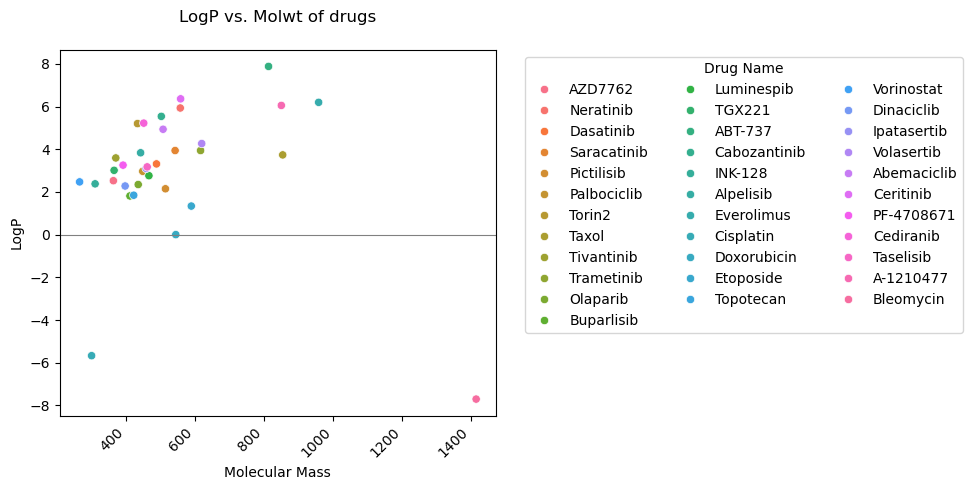

In [40]:
plt.figure(figsize=(10,5))
bars = sns.scatterplot(drugs_EDA, x = drugs_EDA["Molecular Mass"], y = drugs_EDA["LogP"], hue = "Name")
plt.axhline(0, color='gray', linewidth=0.8)
plt.title("LogP vs. Molwt of drugs", pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Drug Name", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.tight_layout()
plt.show()

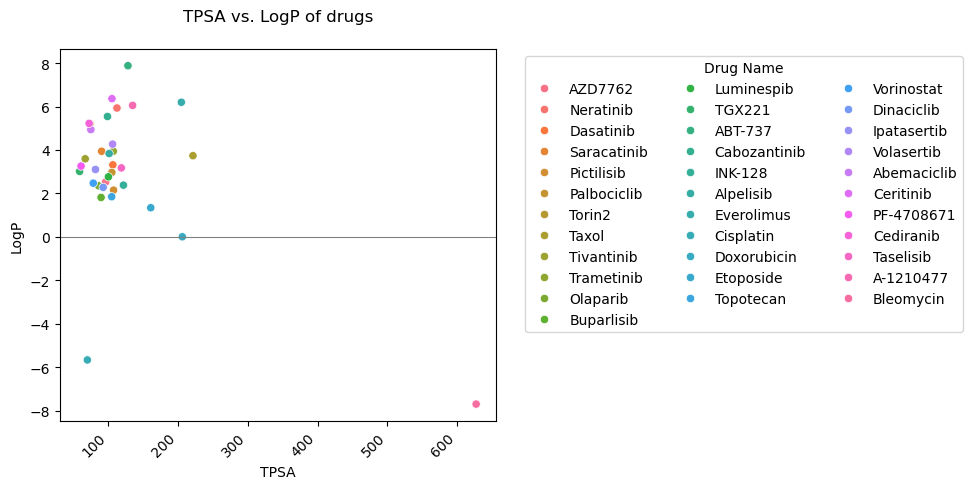

In [42]:
plt.figure(figsize=(10,5))
bars = sns.scatterplot(drugs_EDA, x = drugs_EDA["TPSA"], y = drugs_EDA["LogP"], hue = "Name")
plt.axhline(0, color='gray', linewidth=0.8)
plt.title("TPSA vs. LogP of drugs", pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Drug Name", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.tight_layout()
plt.show()

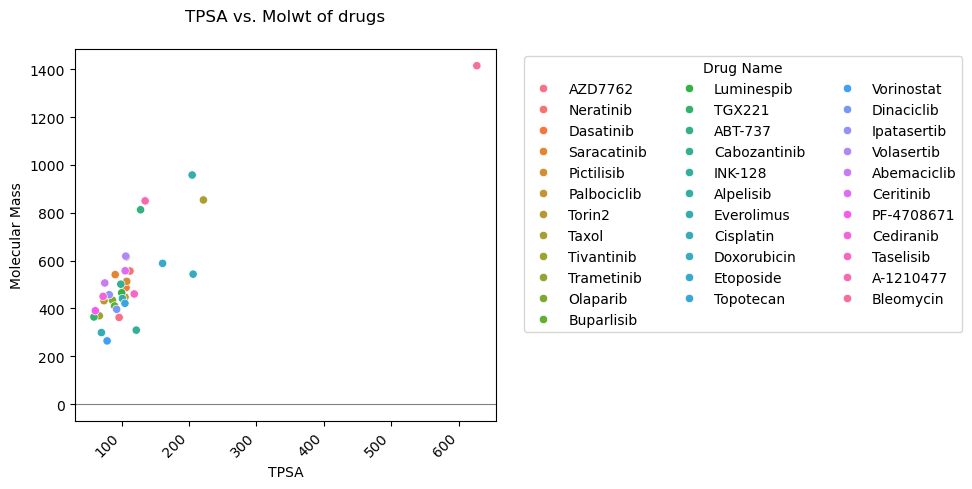

In [45]:
plt.figure(figsize=(10,5))
bars = sns.scatterplot(drugs_EDA, x = drugs_EDA["TPSA"], y = drugs_EDA["Molecular Mass"], hue = "Name")
plt.axhline(0, color='gray', linewidth=0.8)
plt.title("TPSA vs. Molwt of drugs", pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Drug Name", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.tight_layout()
plt.show()

In [46]:
drugs_EDA = drugs_EDA[['Name', 'Molecular Mass', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'structure','SMILES', 'Fingerprint']]

Importance of TPSA:

https://pressbooks.openeducationalberta.ca/abcofpkpd/chapter/tpsa/ 

Topological polar surface area (TPSA), sometimes referred to simply as “polar surface area” (PSA) is a value that can be calculated for a drug that provides an indication of the drug’s polarity, and thus an indication of its lipid solubility. 

<mark>Drugs with higher TPSA values are less lipid-soluble and will, in general, be absorbed less extensively and more slowly, and will distribute less extensively, than drugs with lower TPSA values.

Once TPSA is known for a drug, the value can be used, for example, to predict the extent to which an oral dose of the drug will be absorbed from the GI tract into the portal circulation, or the extent to which the drug will partition into the brain from the plasma, by consulting published graphs that relate TPSA values to these drug behaviours.

TPSA is used as a translation for PK/PD.

In [50]:
drugs_EDA.to_csv("Descriptors_Small_Molecules.csv")